<a href="https://colab.research.google.com/github/moniqueabu/data_science_final_project/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

# New Section

In [ ]:
!pip install dc_stat_think

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import dc_stat_think as  dcst 
import itertools
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics


#hi 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("survey.csv")

In [ ]:
#df.value_counts(subset="Gender")

In [ ]:
#Cleaning gender column
female_names = {'Female ','f','female', 'F', 'Woman', 'Female', 'femail', 'cis-female/femme', 'Trans-female', 'Cis Female', 'Femake', 'Female (cis)', 'Trans woman','woman', "Female (trans)" }
male_names = {'Male', 'Male ', 'male', 'M', 'm', 'Make', 'Male-ish', 'Man', 'Cis Male', 'maile', 'msle', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'Male (CIS)', 'Mal', 'Mail', 'Guy (-ish) ^_^', 'Cis Man', 'something kinda male?'}
non_names = {'Agender', 'All', 'Androgyne', 'Enby', 'Genderqueer', 'Nah', 'male leaning androgynous', 'fluid', 'Neuter', 'non-binary', 'queer', 'queer/she/they'}
df.replace(to_replace = female_names, value = "Female", inplace=True)
df.replace(to_replace = male_names, value = "Male", inplace=True)
df.replace(to_replace = non_names, value = "Gender non-conforming", inplace=True)
#print(df)

In [ ]:
df.value_counts(subset="Gender")

Gender
Male                     994
Female                   251
Gender non-conforming     12
A little about you         1
p                          1
dtype: int64

In [ ]:
#delete p and a little about you 
df.drop(df.loc[df["Gender"] == "p"].index, inplace = True)
df.drop(df.loc[df["Gender"] == "A little about you"].index, inplace = True)

In [ ]:
df.value_counts(subset="Gender")

Gender
Male                     994
Female                   251
Gender non-conforming     12
dtype: int64

In [ ]:
df.drop(df.loc[df["Age"] > 100].index, inplace = True)
df.drop(df.loc[df["Age"] < 18].index, inplace = True)
df.value_counts(subset="Age")

Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
20     6
48     6
50     6
51     5
56     4
49     4
57     3
55     3
54     3
47     2
60     2
53     1
58     1
61     1
62     1
65     1
72     1
dtype: int64

In [ ]:
df.value_counts(subset="treatment")

treatment
Yes    632
No     619
dtype: int64

In [ ]:
df.describe(include ="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1251,1251.000000,1251,1251,738,1233,1251,1251,989,1251,...,1251,1251,1251,1251,1251,1251,1251,1251,1251,161
unique,1239,NaN,3,46,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,157
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,989,746,138,1091,762,632,464,289,...,561,487,920,771,512,1003,555,574,1070,5
mean,NaN,32.076739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.288272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


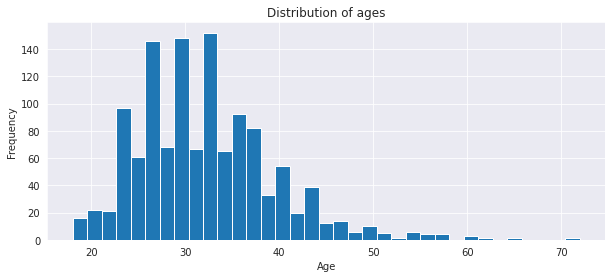

In [ ]:
#df.plt.hist(column = 'Age', bins= int(np.sqrt(len(df['Age']))))
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
plt.hist(df['Age'], bins= int(np.sqrt(1275)))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of ages")
plt.show()

In [ ]:
#df.set_index('benefits').plot(kind='bar', stacked=True, color=['green', 'red'])

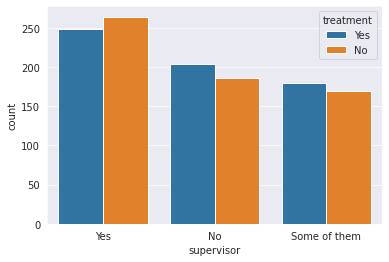

In [ ]:
sns.countplot(data=df, x='supervisor', hue='treatment')

Making stacked bar plot

In [ ]:
data_chart = df[['treatment','seek_help', 'coworkers', 'supervisor', 'care_options' ]] 
data_encoding = {'Yes': 1, 'No': 2, 'Some of them': 3, "Don't know": 4, 'Not sure': 4} 
# dont know and not sure are treated the same
for i in data_chart.columns: 
    data_chart[i] = data_chart[i].replace(data_encoding)
    
data_chart.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,treatment,seek_help,coworkers,supervisor,care_options
0,1,1,3,1,4
1,2,4,2,2,2
2,2,2,1,1,2
3,1,2,3,2,1
4,2,4,3,1,2


In [ ]:
frequencies = {}
for i in data_chart.columns: 
    frequencies[i] = data_chart[i].value_counts()
    
plotdata = pd.DataFrame(frequencies)
plotdata.fillna(0, inplace=True)

plotdata = plotdata.transpose()
plotdata_percent = plotdata.div(plotdata.sum(axis=1), axis = 0)*100
plotdata.head()
plotdata_percent.head()

,1,2,3,4
treatment,50.519584,49.480416,0.000000,0.000000
seek_help,19.744205,51.239009,0.000000,29.016787
coworkers,17.745803,20.623501,61.630695,0.000000
supervisor,40.927258,31.175060,27.897682,0.000000
care_options,35.091926,39.888090,0.000000,25.019984


In [ ]:
series1 = df.loc[(df["treatment"] == 'Yes')].Age
series2 = df.loc[(df["treatment"] == 'No')].Age
series1 = series1[:619]
print(series1)
print(series2)

0       37
3       31
6       35
8       42
10      31
        ..
1235    23
1236    60
1238    28
1240    31
1241    31
Name: Age, Length: 619, dtype: int64
1       44
2       32
4       31
5       33
7       39
        ..
1239    30
1244    32
1246    32
1253    36
1257    46
Name: Age, Length: 619, dtype: int64


In [ ]:
# Compute mean of all forces: 
empirical_diff_means = np.mean(series1) - np.mean(series2)
series_conc = np.concatenate((series1, series2))
mean_force = np.median(series_conc)


# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = dcst.draw_bs_pairs(series1, series2, dcst.diff_of_means, size = 10000)
bs_replicates_b = dcst.draw_bs_pairs(series1, series2, dcst.diff_of_means, size = 10000)



# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates <= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.9724


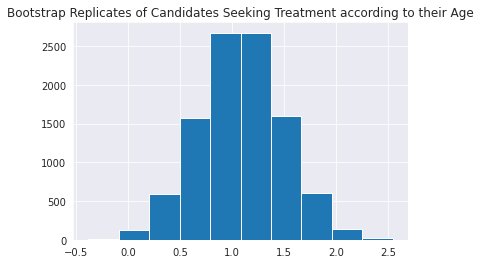

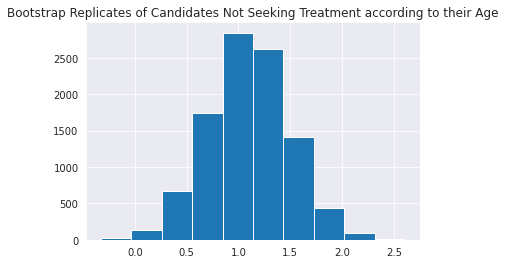

In [ ]:
plt.hist(bs_replicates_a, bins = 10)
plt.title("Bootstrap Replicates of Candidates Seeking Treatment according to their Age")
plt.show()
plt.hist(bs_replicates_b, bins = 10)
plt.title("Bootstrap Replicates of Candidates Not Seeking Treatment according to their Age")
plt.show()



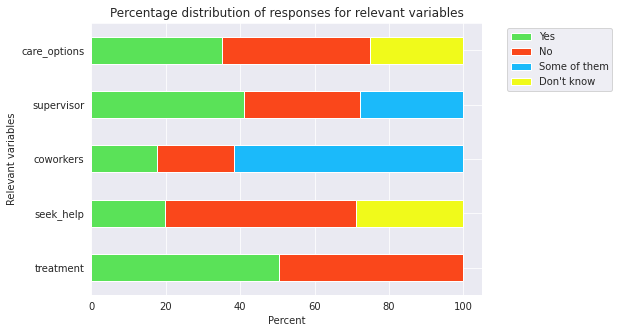

In [ ]:
data_colors= {1: '#5ae258', 2: '#fa471b',3: '#1bbafa',  4: '#f0fa1b'} 

plotdata_percent.plot(kind='barh', stacked=True, color=data_colors, figsize=(7, 5))
plt.legend(data_encoding, bbox_to_anchor = (1.05, 1))
plt.title("Percentage distribution of responses for relevant variables")
plt.ylabel("Relevant variables")
plt.xlabel("Percent")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


0.9707446808510638


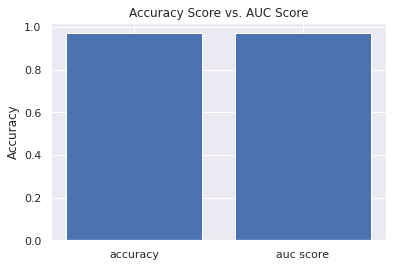

In [ ]:

cat_cols = ["benefits", "family_history", "work_interfere", 'obs_consequence',]
df_encoded = pd.get_dummies(df[cat_cols])
#df_encoded = df.copy()
#df_encoded = df_encoded[cat_cols]
df_encoded = df_encoded.dropna()

data_chart = df[['treatment']] 
data_encoding = {'Yes': 1, 'No': 2, 'Some of them': 3, "Don't know": 4, 'Not sure': 4} 
# dont know and not sure are treated the same
for i in data_chart.columns: 
    data_chart[i] = data_chart[i].replace(data_encoding)
    
df_encoded['treatment'] = data_chart

X = df_encoded
y = df_encoded['treatment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=5)


neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test) 

testMetrics = {}

testMetrics['accuracy'] = accuracy_score(y_test, y_pred)
print(testMetrics['accuracy'])

#AUC test 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
testMetrics['auc score'] = metrics.auc(fpr, tpr)

lists = sorted(testMetrics.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.title('Accuracy Score vs. AUC Score')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Accuracy')

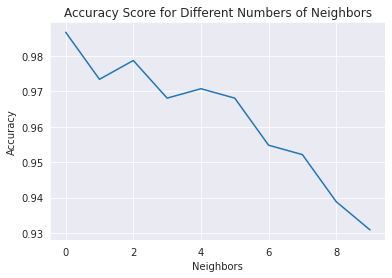

In [ ]:
neighbors = [i for i in range(1, 11)]

scores = []

for neighbor in neighbors:
  neigh = KNeighborsClassifier(n_neighbors=neighbor)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test) 
  scores.append(accuracy_score(y_test, y_pred))

plt.plot(scores)
plt.title("Accuracy Score for Different Numbers of Neighbors")
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

In [ ]:

cat_cols = ["benefits", "family_history", "no_employees", "work_interfere" , "remote_work", "tech_company",'supervisor', 'obs_consequence']

In [ ]:
pd.get_dummies(df[cat_cols])



,benefits_Don't know,benefits_No,benefits_Yes,family_history_No,family_history_Yes,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,...,work_interfere_Sometimes,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,obs_consequence_No,obs_consequence_Yes
0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
4,0,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
1255,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
1256,0,0,1,0,1,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
1257,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,0


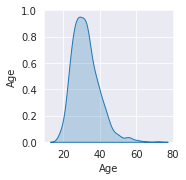

In [ ]:
#initial data exploration
sns.pairplot(data = df, kind = "scatter", diag_kind = 'kde')


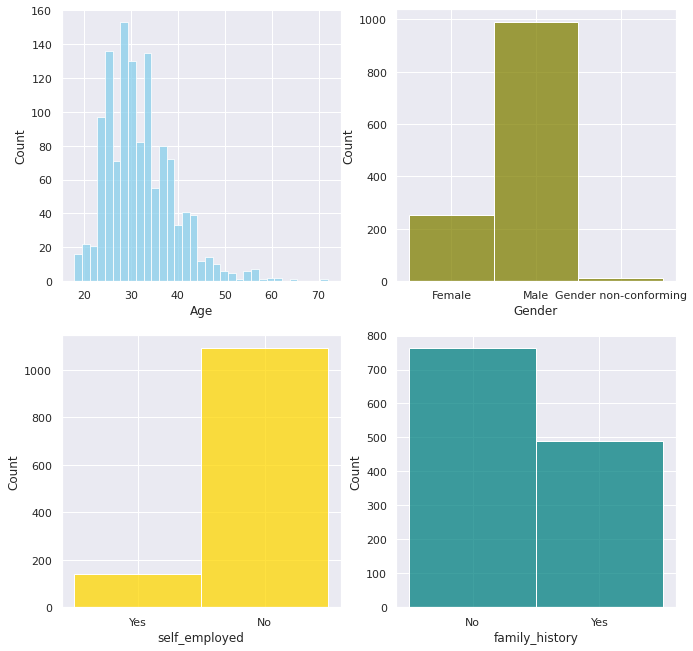

In [ ]:
#initial data exploration 
sns.set(style="darkgrid")


fig, axs = plt.subplots(2,2, figsize=(11, 11))

sns.histplot(data=df, x="Age", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Gender", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="self_employed", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="family_history", color="teal", ax=axs[1, 1])

plt.show()

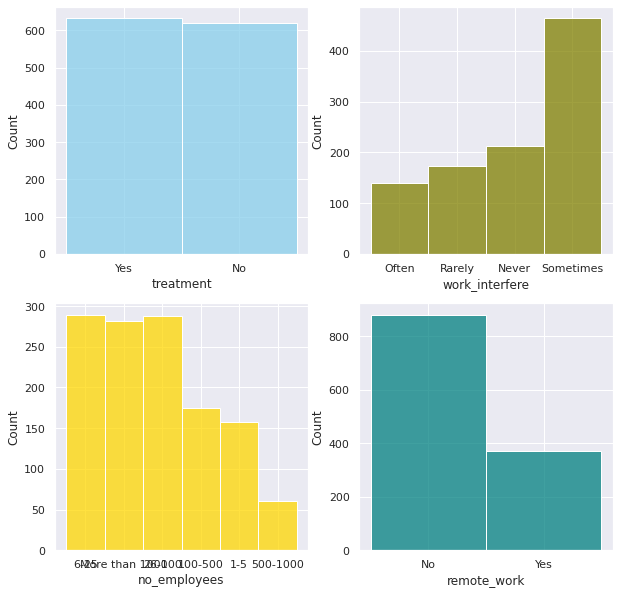

In [ ]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2,2, figsize=(10, 10))


sns.histplot(data=df, x="treatment", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="work_interfere", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="no_employees", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="remote_work", color="teal", ax=axs[1, 1])




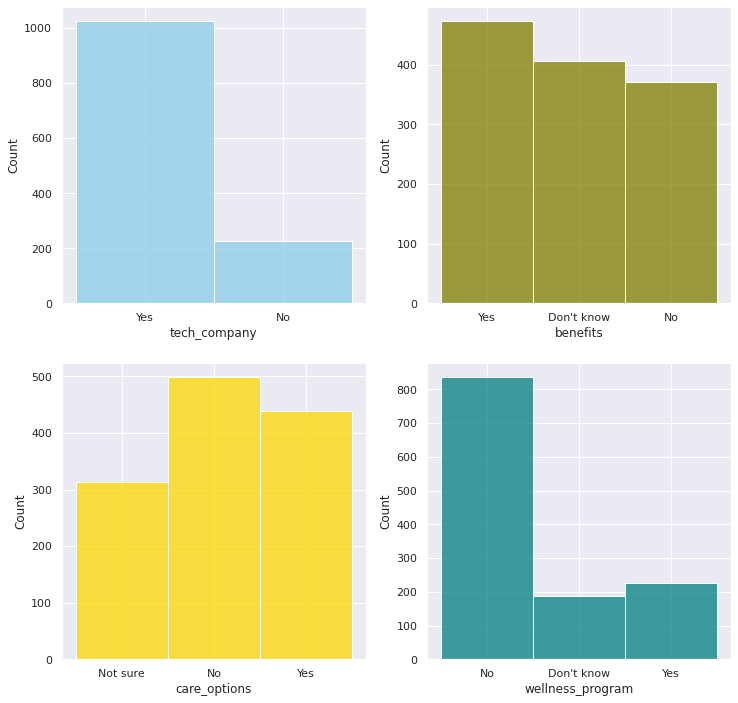

In [ ]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2,2, figsize=(12, 12))


sns.histplot(data=df, x="tech_company", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="benefits", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="care_options", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="wellness_program", color="teal", ax=axs[1, 1])

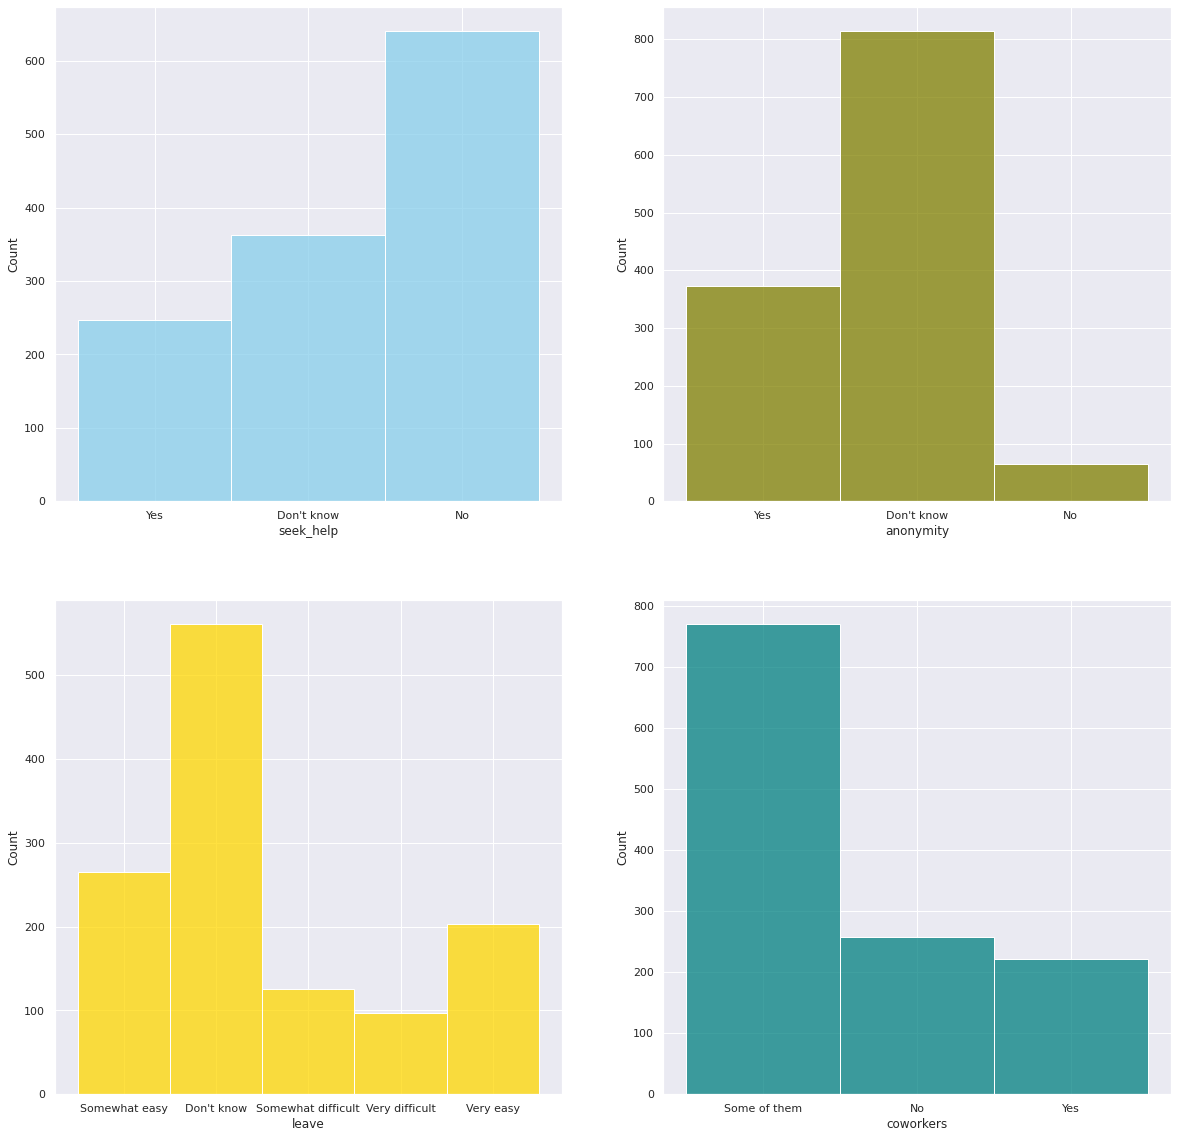

In [ ]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2,2, figsize=(20, 20))


sns.histplot(data=df, x="seek_help", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="anonymity", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="leave", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="coworkers", color="teal", ax=axs[1, 1])


In [ ]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2,2, figsize=(20, 20))


sns.histplot(data=df, x="supervisor", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="obs_consequence", color="olive", ax=axs[0, 1])


NameError: ignored